<a href="https://colab.research.google.com/github/CarlosMenacho/robot_fall_detection/blob/master/Fall_training_optFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from tensorflow import keras
print(keras.__version__)

2.2.4-tf


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
%%capture
!cp drive/My\ Drive/URFD_images.zip .
!unzip URFD_images.zip

In [0]:
!mkdir data
!mkdir data/training data/validation data/test
!mkdir data/training/fall data/validation/fall data/test/fall
!mkdir data/training/no_fall data/validation/no_fall data/test/no_fall
!mkdir raw_falls raw_nofalls

In [0]:
import cv2
import numpy as np 
import os 

falls_path = 'URFD_images/Falls/'
noFalls_path = 'URFD_images/NotFalls/'

falls_dir = os.listdir(falls_path)
falls_dir.sort()

print(falls_dir)


hsv = None

count = 0
for folder in falls_dir:
    print(falls_path+folder)
    img_path = os.listdir(falls_path+folder)
    img_path.sort()
    for x in range(0,len(img_path)):
                
        img = cv2.imread(falls_path+folder+'/'+img_path[x],0)
        if hsv is None:
            img = cv2.imread(falls_path+folder+'/'+img_path[x])
            hsv = np.zeros_like(img)
            hsv[...,1] = 255
            break
            
        try:
            prev_1 = cv2.imread(falls_path+folder+'/'+img_path[x-1],0)
            
            flow = cv2.calcOpticalFlowFarneback(prev_1,img, None, 0.5, 3, 15, 3, 5, 1.2, 0)
            vert = cv2.normalize(flow[...,1], None, 0, 255, cv2.NORM_MINMAX)
            vert = vert.astype('uint8')

            kernel = np.ones((15,15),np.float32)/225
            smoothed = cv2.filter2D(vert,-1,kernel)

            #prev_2 = cv2.imread(falls_path+folder+'/'+img_path[x-2],0)
            #prev_3 = cv2.imread(falls_path+folder+'/'+img_path[x-3],0)
            #new = np.stack((img,prev_1,prev_2),axis=-1)
            
            cv2.imwrite("raw_falls/"+folder+"_"+"%05d"%(count,)+".png", smoothed)
            count+=1
        except Exception as e:
            print("Wait !! that's ilegal: ", e)
    count = 0
    k = cv2.waitKey(10) & 0xff


nofalls_dir = os.listdir(noFalls_path)
nofalls_dir.sort()

hsv = None

print(nofalls_dir)

count = 0
for folder in nofalls_dir:
    print(noFalls_path+folder)
    img_path = os.listdir(noFalls_path+folder)
    img_path.sort()
    for x in range(0,len(img_path)):
        img = cv2.imread(noFalls_path+folder+'/'+img_path[x],0)
        
        if hsv is None:
            img = cv2.imread(noFalls_path+folder+'/'+img_path[x])
            hsv = np.zeros_like(img)
            hsv[...,1] = 255
            break
        try:
            prev_1 = cv2.imread(noFalls_path+folder+'/'+img_path[x-1],0)
            flow = cv2.calcOpticalFlowFarneback(prev_1,img, None, 0.5, 3, 15, 3, 5, 1.2, 0)
            vert = cv2.normalize(flow[...,1], None, 0, 255, cv2.NORM_MINMAX)
            vert = vert.astype('uint8')

            kernel = np.ones((15,15),np.float32)/225
            smoothed = cv2.filter2D(vert,-1,kernel)
            
            cv2.imwrite("raw_nofalls/"+folder+"_"+"%05d"%(count,)+".png", smoothed)
            count+=1
        except Exception as e:
            print("Wait !! that's ilegal")
    count = 0
    k = cv2.waitKey(10) & 0xff


['fall_fall-01', 'fall_fall-02', 'fall_fall-03', 'fall_fall-04', 'fall_fall-05', 'fall_fall-06', 'fall_fall-07', 'fall_fall-08', 'fall_fall-09', 'fall_fall-10', 'fall_fall-11', 'fall_fall-12', 'fall_fall-13', 'fall_fall-14', 'fall_fall-15', 'fall_fall-16', 'fall_fall-17', 'fall_fall-18', 'fall_fall-19', 'fall_fall-20', 'fall_fall-21', 'fall_fall-22', 'fall_fall-23', 'fall_fall-24', 'fall_fall-25', 'fall_fall-26', 'fall_fall-27', 'fall_fall-28', 'fall_fall-29', 'fall_fall-30']
URFD_images/Falls/fall_fall-01
URFD_images/Falls/fall_fall-02
URFD_images/Falls/fall_fall-03
URFD_images/Falls/fall_fall-04
URFD_images/Falls/fall_fall-05
URFD_images/Falls/fall_fall-06
URFD_images/Falls/fall_fall-07
URFD_images/Falls/fall_fall-08
URFD_images/Falls/fall_fall-09
URFD_images/Falls/fall_fall-10
URFD_images/Falls/fall_fall-11
URFD_images/Falls/fall_fall-12
URFD_images/Falls/fall_fall-13
URFD_images/Falls/fall_fall-14
URFD_images/Falls/fall_fall-15
URFD_images/Falls/fall_fall-16
URFD_images/Falls/fall_

In [0]:
import random

falls = os.listdir('raw_falls')
no_falls = os.listdir('raw_nofalls')
print(len(falls))
print(len(no_falls))


random.shuffle(falls)
count = 1
for fall in falls:
    if count<=609:
        os.rename("raw_falls/"+fall, "data/training/fall/"+fall)
        
    if 609<count<=739:
        os.rename("raw_falls/"+fall, "data/validation/fall/"+fall)
    if 739<count:
        os.rename("raw_falls/"+fall, "data/test/fall/"+fall)

    count+=1

random.shuffle(no_falls)
count = 1
for no_fall in no_falls:
    if count<=7620:
        os.rename("raw_nofalls/"+no_fall, "data/training/no_fall/"+no_fall)
        
    if 7620<count<=9250:
        os.rename("raw_nofalls/"+no_fall, "data/validation/no_fall/"+no_fall)
    if 9252<count:
        os.rename("raw_nofalls/"+no_fall, "data/test/no_fall/"+no_fall)
    count+=1


870
10886


In [0]:
%%capture

import matplotlib
from matplotlib import pyplot
import numpy as np 

!pip install livelossplot

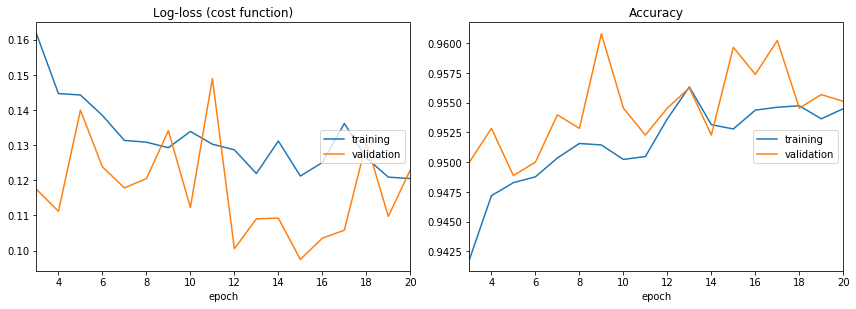

Log-loss (cost function):
training   (min:    0.120, max:    0.216, cur:    0.120)
validation (min:    0.097, max:    0.172, cur:    0.123)

Accuracy:
training   (min:    0.928, max:    0.956, cur:    0.954)
validation (min:    0.935, max:    0.961, cur:    0.955)


In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.optimizers import RMSprop
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.callbacks import CSVLogger
from math import ceil
from livelossplot import PlotLossesKeras

TRAINING_LOGS_FILE = "training_logs.csv"
MODEL_SUMMARY_FILE = "model_summary.txt"
TEST_FILE = "test_file.txt"
MODEL_FILE = "custom_model_weights.h5"

# Data
training_data_dir ='data/training/' # 10 000 * 2
validation_data_dir = 'data/validation/' # 2 500 * 2
test_data_dir = 'data/test/' # 12 500

# Hyperparams
IMAGE_SIZE = 224
IMAGE_WIDTH, IMAGE_HEIGHT = IMAGE_SIZE, IMAGE_SIZE
EPOCHS = 20
BATCH_SIZE = 32
TEST_SIZE = 30

input_shape = (IMAGE_WIDTH, IMAGE_HEIGHT, 3)

# Model 5
model = Sequential()

model.add(Conv2D(3, 3, 3, border_mode='same', input_shape=input_shape, activation='relu'))

model.add(Conv2D(32, 3, 3, border_mode='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, 3, 3, border_mode='same', activation='relu'))

model.add(Conv2D(64, 3, 3, border_mode='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, 3, 3, border_mode='same', activation='relu'))

model.add(Conv2D(128, 3, 3, border_mode='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, 3, 3, border_mode='same', activation='relu'))

model.add(Conv2D(256, 3, 3, border_mode='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(2))
model.add(Activation('sigmoid'))
    
model.compile(loss='categorical_crossentropy',
            optimizer=RMSprop(lr=0.0001),
            metrics=['accuracy'])


print(model.summary())

with open('custom_model.txt','w') as fh:
    # Pass the file handle in as a lambda function to make it callable
    model.summary(print_fn=lambda x: fh.write(x + '\n'))

# Data augmentation
training_data_generator =ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

validation_data_generator = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_data_generator = ImageDataGenerator()

# Data preparation
training_generator = training_data_generator.flow_from_directory(
    training_data_dir,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode="categorical")

validation_generator = validation_data_generator.flow_from_directory(
    validation_data_dir,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode="categorical")

test_generator = test_data_generator.flow_from_directory(
    test_data_dir,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode="categorical", 
    shuffle=False)
print(len(training_generator.filenames))
print(len(validation_generator.filenames))
# 
# Training
model.fit_generator(
    training_generator,
    steps_per_epoch = len(training_generator.filenames) // BATCH_SIZE,
    epochs=EPOCHS,
    verbose=1,
    callbacks=[PlotLossesKeras(), CSVLogger(TRAINING_LOGS_FILE,
                                            append=False,
                                            separator=";")],
    validation_data=validation_generator,
    validation_steps= len(validation_generator.filenames) // BATCH_SIZE
    )

model.save_weights("opt_custom_model_weights.h5")
model.save("opt_custom_model.h5")

In [0]:
import numpy as np
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(224,224),
    color_mode="rgb",
    shuffle=False,
    class_mode = 'categorical',
    batch_size=32)

number_of_samples = len(test_generator.filenames)//32+1
y_pred = model.predict_generator(test_generator,steps=number_of_samples )

y_pred = np.argmax(y_pred,axis=1)
conf_matrix= confusion_matrix(test_generator.classes, y_pred)
print("confusion matrix")
print(conf_matrix)
print("Accuracy score", accuracy_score(test_generator.classes, y_pred))
print("recall score", recall_score(test_generator.classes, y_pred))
print("prcision score", precision_score(test_generator.classes, y_pred))
print("report")
print(classification_report(test_generator.classes, y_pred))


Found 1765 images belonging to 2 classes.
confusion matrix
[[ 131    0]
 [1634    0]]
('Accuracy score', 0.07422096317280454)
('recall score', 0.0)
('prcision score', 0.0)
report
              precision    recall  f1-score   support

           0       0.07      1.00      0.14       131
           1       0.00      0.00      0.00      1634

   micro avg       0.07      0.07      0.07      1765
   macro avg       0.04      0.50      0.07      1765
weighted avg       0.01      0.07      0.01      1765



/usr/local/lib/python2.7/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python2.7/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [0]:
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential, Model 
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D
from keras import backend as k 
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping
from keras.optimizers import RMSprop
from keras.applications.vgg16 import VGG16
from livelossplot import PlotLossesKeras
from keras.callbacks import CSVLogger

TRAINING_LOGS_FILE = "training_logs.csv"
MODEL_SUMMARY_FILE = "model_summary.txt"
TEST_FILE = "test_file.txt"
MODEL_FILE = "custom_model_weights.h5"

# Data
training_data_dir ='data/training/' 
validation_data_dir = 'data/validation/'
test_data_dir = 'data/test/' 

# Hyperparams
IMAGE_SIZE = 224
IMAGE_WIDTH, IMAGE_HEIGHT = IMAGE_SIZE, IMAGE_SIZE
EPOCHS = 20
BATCH_SIZE = 32
TEST_SIZE = 30

input_shape = (IMAGE_WIDTH, IMAGE_HEIGHT, 3)


img_width = 224
img_height = 224
base_model = VGG16(weights = "imagenet", include_top=False, input_shape = (img_width, img_height, 3))

x = base_model.output
x = GlobalAveragePooling2D(name='avg_pool')(x)
x = Dropout(0.4)(x)
predictions = Dense(1, activation='sigmoid')(x)
model = Model(inputs=base_model.input, outputs=predictions)

model.summary()
len(model.layers)
for layer in base_model.layers:
    layer.trainable = False
model.compile(loss='binary_crossentropy',
            optimizer=RMSprop(lr=0.0001),
            metrics=['accuracy'])

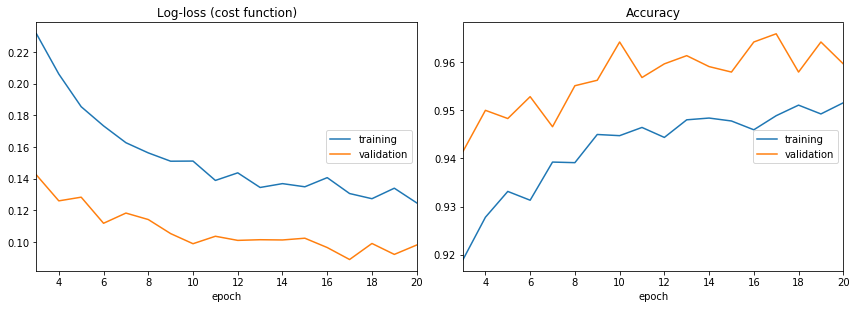

Log-loss (cost function):
training   (min:    0.125, max:    1.043, cur:    0.125)
validation (min:    0.089, max:    0.259, cur:    0.098)

Accuracy:
training   (min:    0.678, max:    0.952, cur:    0.952)
validation (min:    0.926, max:    0.966, cur:    0.960)


In [0]:
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential, Model 
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D
from keras import backend as k 
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping
from keras.optimizers import RMSprop
from keras.applications.vgg16 import VGG16
from livelossplot import PlotLossesKeras
from keras.callbacks import CSVLogger

TRAINING_LOGS_FILE = "training_logs.csv"
MODEL_SUMMARY_FILE = "model_summary.txt"
TEST_FILE = "test_file.txt"
MODEL_FILE = "custom_model_weights.h5"

# Data
training_data_dir ='data/training/' 
validation_data_dir = 'data/validation/'
test_data_dir = 'data/test/' 

# Hyperparams
IMAGE_SIZE = 224
IMAGE_WIDTH, IMAGE_HEIGHT = IMAGE_SIZE, IMAGE_SIZE
EPOCHS = 20
BATCH_SIZE = 32
TEST_SIZE = 30

input_shape = (IMAGE_WIDTH, IMAGE_HEIGHT, 3)


img_width = 224
img_height = 224
base_model = VGG16(weights = "imagenet", include_top=False, input_shape = (img_width, img_height, 3))

x = base_model.output
x = GlobalAveragePooling2D(name='avg_pool')(x)
x = Dropout(0.4)(x)
predictions = Dense(2, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

model.summary()
len(model.layers)
for layer in base_model.layers:
    layer.trainable = False

model.compile(loss='categorical_crossentropy',
            optimizer=RMSprop(lr=0.0001),
            metrics=['accuracy'])

with open('vgg_model.txt','w') as fh:
    # Pass the file handle in as a lambda function to make it callable
    model.summary(print_fn=lambda x: fh.write(x + '\n'))
training_data_generator = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

validation_data_generator =ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_data_generator = ImageDataGenerator()

# Data preparation
training_generator = training_data_generator.flow_from_directory(
    training_data_dir,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode="categorical")

validation_generator = validation_data_generator.flow_from_directory(
    validation_data_dir,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode="categorical")

test_generator = test_data_generator.flow_from_directory(
    test_data_dir,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode="categorical", 
    shuffle=False)
print(len(training_generator.filenames))
print(len(validation_generator.filenames))
# 
# Training
model.fit_generator(
    training_generator,
    steps_per_epoch = len(training_generator.filenames) // BATCH_SIZE,
    epochs=EPOCHS,
    verbose=1,
    callbacks=[PlotLossesKeras(), CSVLogger(TRAINING_LOGS_FILE,
                                            append=False,
                                            separator=";")],
    validation_data=validation_generator,
    validation_steps= len(validation_generator.filenames) // BATCH_SIZE
    )

model.save_weights("vgg_opt_custom_model_weights2.h5")
model.save("vgg_opt_custom_model2.h5")

In [0]:
import numpy as np
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(224,224),
    color_mode="rgb",
    shuffle=False,
    class_mode = 'categorical',
    batch_size=32)

number_of_samples = len(test_generator.filenames)//32+1
y_pred = model.predict_generator(test_generator,steps=number_of_samples )

y_pred = np.argmax(y_pred,axis=1)
conf_matrix= confusion_matrix(test_generator.classes, y_pred)
print("confusion matrix")
print(conf_matrix)
print("Accuracy score", accuracy_score(test_generator.classes, y_pred))
print("recall score", recall_score(test_generator.classes, y_pred))
print("prcision score", precision_score(test_generator.classes, y_pred))
print("report")
print(classification_report(test_generator.classes, y_pred))


Found 1765 images belonging to 2 classes.
confusion matrix
[[   0  131]
 [   0 1634]]
('Accuracy score', 0.9257790368271954)
('recall score', 1.0)
('prcision score', 0.9257790368271954)
report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       131
           1       0.93      1.00      0.96      1634

   micro avg       0.93      0.93      0.93      1765
   macro avg       0.46      0.50      0.48      1765
weighted avg       0.86      0.93      0.89      1765



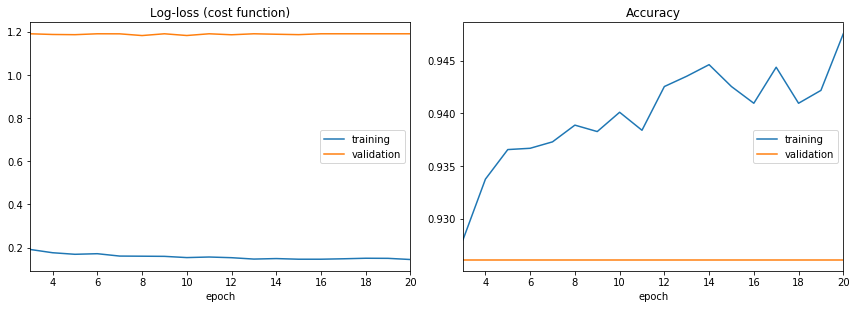

Log-loss (cost function):
training   (min:    0.145, max:    0.265, cur:    0.145)
validation (min:    1.182, max:    1.191, cur:    1.191)

Accuracy:
training   (min:    0.920, max:    0.948, cur:    0.948)
validation (min:    0.926, max:    0.926, cur:    0.926)


In [0]:
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential, Model 
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D
from keras import backend as k 
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping
from keras.optimizers import RMSprop
from keras.applications.vgg16 import VGG16
from livelossplot import PlotLossesKeras
from keras.callbacks import CSVLogger
from keras.applications.inception_v3 import InceptionV3

TRAINING_LOGS_FILE = "training_logs.csv"
MODEL_SUMMARY_FILE = "model_summary.txt"
TEST_FILE = "test_file.txt"
MODEL_FILE = "custom_model_weights.h5"

# Data
training_data_dir ='data/training/' 
validation_data_dir = 'data/validation/'
test_data_dir = 'data/test/' 

# Hyperparams
IMAGE_SIZE = 224
IMAGE_WIDTH, IMAGE_HEIGHT = IMAGE_SIZE, IMAGE_SIZE
EPOCHS = 20
BATCH_SIZE = 32
TEST_SIZE = 30

input_shape = (IMAGE_WIDTH, IMAGE_HEIGHT, 3)


img_width = 224
img_height = 224
base_model = InceptionV3(weights = "imagenet", include_top=False, input_shape = (img_width, img_height, 3))
x = base_model.output
x = GlobalAveragePooling2D(name='avg_pool')(x)
x = Dropout(0.4)(x)
predictions = Dense(2, activation='softmax')(x)
model2 = Model(inputs=base_model.input, outputs=predictions)
model2.summary()
len(model.layers)
for layer in base_model.layers:
    layer.trainable = False

model2.compile(loss='categorical_crossentropy',
            optimizer=RMSprop(lr=0.0001),
            metrics=['accuracy'])

training_data_generator = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

validation_data_generator =ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_data_generator = ImageDataGenerator()

# Data preparation
training_generator = training_data_generator.flow_from_directory(
    training_data_dir,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode="categorical")

validation_generator = validation_data_generator.flow_from_directory(
    validation_data_dir,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode="categorical")

test_generator = test_data_generator.flow_from_directory(
    test_data_dir,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode="categorical", 
    shuffle=False)
print(len(training_generator.filenames))
print(len(validation_generator.filenames))
# 
# Training
model2.fit_generator(
    training_generator,
    steps_per_epoch = len(training_generator.filenames) // BATCH_SIZE,
    epochs=EPOCHS,
    verbose=1,
    callbacks=[PlotLossesKeras(), CSVLogger(TRAINING_LOGS_FILE,
                                            append=False,
                                            separator=";")],
    validation_data=validation_generator,
    validation_steps= len(validation_generator.filenames) // BATCH_SIZE
    )

model2.save_weights("Inception_model_weights.h5")
model2.save("Inception_model.h5")

131
1634
1765


In [0]:
import numpy as np
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(224,224),
    color_mode="rgb",
    shuffle=False,
    class_mode = 'categorical',
    batch_size=32)

number_of_samples = len(test_generator.filenames)//32+1
y_pred = model2.predict_generator(test_generator,steps=number_of_samples )

y_pred = np.argmax(y_pred,axis=1)
conf_matrix= confusion_matrix(test_generator.classes, y_pred)
print("confusion matrix")
print(conf_matrix)
print("Accuracy score", accuracy_score(test_generator.classes, y_pred))
print("recall score", recall_score(test_generator.classes, y_pred))
print("prcision score", precision_score(test_generator.classes, y_pred))
print("report")
print(classification_report(test_generator.classes, y_pred))



Found 1765 images belonging to 2 classes.
confusion matrix
[[   2  129]
 [   2 1632]]
('Accuracy score', 0.9257790368271954)
('recall score', 0.9987760097919217)
('prcision score', 0.9267461669505963)
report
              precision    recall  f1-score   support

           0       0.50      0.02      0.03       131
           1       0.93      1.00      0.96      1634

   micro avg       0.93      0.93      0.93      1765
   macro avg       0.71      0.51      0.50      1765
weighted avg       0.90      0.93      0.89      1765



In [0]:
!cp drive/My\ Drive/Carlos.tar.gz .
!tar -xvf Carlos.tar.gz

Carlos/22.png
Carlos/55.png
Carlos/23.png
Carlos/56.png
Carlos/24.png
Carlos/57.png
Carlos/25.png
Carlos/60.png
Carlos/58.png
Carlos/26.png
Carlos/61.png
Carlos/59.png
Carlos/27.png
Carlos/62.png
Carlos/000.png
Carlos/30.png
Carlos/63.png
Carlos/28.png
Carlos/31.png
Carlos/64.png
Carlos/29.png
Carlos/002.png
Carlos/32.png
Carlos/65.png
Carlos/003.png
Carlos/33.png
Carlos/66.png
Carlos/001.png
Carlos/34.png
Carlos/67.png
Carlos/70.png
Carlos/35.png
Carlos/68.png
Carlos/36.png
Carlos/71.png
Carlos/69.png
Carlos/72.png
Carlos/37.png
Carlos/004.png
Carlos/40.png
Carlos/73.png
Carlos/38.png
Carlos/
Carlos/005.png
Carlos/41.png
Carlos/39.png
Carlos/74.png
Carlos/42.png
Carlos/006.png
Carlos/75.png
Carlos/10.png
Carlos/43.png
Carlos/007.png
Carlos/76.png
Carlos/11.png
Carlos/44.png
Carlos/008.png
Carlos/77.png
Carlos/12.png
Carlos/45.png
Carlos/80.png
Carlos/009.png
Carlos/78.png
Carlos/13.png
Carlos/81.png
Carlos/46.png
Carlos/79.png
Carlos/14.png
Carlos/47.png
Carlos/82.png
Carlos/15.png
Ca

In [0]:
import os
import random
from os import listdir
from os.path import isfile, join
import cv2
import time
import numpy as np 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import load_model
from numpy import loadtxt
import matplotlib.pyplot as plt

model1 = load_model('opt_custom_model.h5')
model1.load_weights('opt_custom_model_weights.h5')

model2 = load_model('vgg_opt_custom_model2.h5')
model2.load_weights('vgg_opt_custom_model_weights2.h5')

model3 = load_model('Inception_model.h5')
model3.load_weights('Inception_model_weights.h5')

#model.summary()






(['000.png', '001.png', '002.png', '003.png', '004.png', '005.png', '006.png', '007.png', '008.png', '009.png', '10.png', '11.png', '12.png', '13.png', '14.png', '15.png', '16.png', '17.png', '18.png', '19.png', '20.png', '21.png', '22.png', '23.png', '24.png', '25.png', '26.png', '27.png', '28.png', '29.png', '30.png', '31.png', '32.png', '33.png', '34.png', '35.png', '36.png', '37.png', '38.png', '39.png', '40.png', '41.png', '42.png', '43.png', '44.png', '45.png', '46.png', '47.png', '48.png', '49.png', '50.png', '51.png', '52.png', '53.png', '54.png', '55.png', '56.png', '57.png', '58.png', '59.png', '60.png', '61.png', '62.png', '63.png', '64.png', '65.png', '66.png', '67.png', '68.png', '69.png', '70.png', '71.png', '72.png', '73.png', '74.png', '75.png', '76.png', '77.png', '78.png', '79.png', '80.png', '81.png', '82.png', '83.png', '84.png', '85.png', '86.png', '87.png'], 88)
('Carlos/000.png', 5.5485566e-07, 0.0024984728, 0.0024984728)
('Carlos/001.png', 6.697441e-08, 0.002498

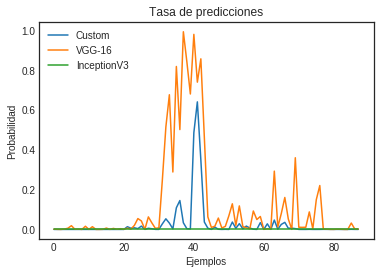

<Figure size 432x288 with 0 Axes>

In [0]:
hsv = None

test_path = 'Carlos/'

falls_dir = os.listdir(test_path)
falls_dir.sort()

print(falls_dir, len(falls_dir))
x1 =[]
x2 =[]
x3 =[]
for x in range(0,len(falls_dir)):            
    img = cv2.imread(test_path+falls_dir[x],0) 
    try:
        prev_1 = cv2.imread(test_path+falls_dir[x-1],0) 
        #print(test_path+falls_dir[x])  
        flow = cv2.calcOpticalFlowFarneback(prev_1,img, None, 0.5, 3, 15, 3, 5, 1.2, 0)
        vert = cv2.normalize(flow[...,1], None, 0, 255, cv2.NORM_MINMAX)
        vert = vert.astype('uint8')
        kernel = np.ones((15,15),np.float32)/225
        smoothed = cv2.filter2D(vert,-1,kernel)

        clas = cv2.cvtColor(smoothed,cv2.COLOR_GRAY2RGB)

        clas = cv2.resize(clas,(224,224))
        clas = np.expand_dims(clas,axis=0)
        pred1 = model1.predict(clas)
        x1.append(pred1[0,0])
        pred2 = model2.predict(clas)
        x2.append(pred2[0,0])
        pred3 = model3.predict(clas)
        x3.append(pred3[0,0])
        print(test_path+falls_dir[x],pred1[0,0],pred[0,0],pred[0,0])       
    except Exception as e:
        print("Wait !! that's ilegal: ", e)
k = cv2.waitKey(10) & 0xff


plt.style.use('seaborn-white')

number = np.arange(len(falls_dir))

fig1 = plt.gcf()
#fig,ax = plt.subplots()
plt.plot(number,x1,label='Custom')
plt.plot(number,x2, label='VGG-16')
plt.plot(number,x3,label='InceptionV3')
plt.legend(loc="upper left")
plt.ylabel('Probabilidad')
plt.xlabel('Ejemplos')
plt.title('Tasa de predicciones')
plt.show()
plt.draw()
fig1.savefig('modelos.png',dpi=100)